# Project #2
*Tiffany Bui, Kevin Ma, Oliver Mills, Zach Russell, Malek Thabet, Jonah Werbel*


## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person develops coronary heart disease (CHD). This is a subset of the data available for the Framingham Heart Study, a longitudinal data set following a sample of patients from Framingham, MA., that began in 1948 and is now on its third generation of participants.

The data include:
  
- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs (e.g. if performance drops on the testing data, you know you're likely over-fitting).

## Concept Summary

Throughout this project we will look throught the different variable and find how they affect or correlate to Ten Year CHD. We plan to do this by using K means clusters, linear regression, and decision trees to explain the most prevalant factors that could lead to CHD. We found some factors such as age or pre-existing conditions like blood pressure issues to increase the likelyhood of having CHD.

## EDA

In [ ]:
!git clone https://github.com/DS3001/project_chd/

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 4.15 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# read in the data
# train = pd.read_csv('fhs_train.csv')
# test = pd.read_csv('fhs_test.csv')

#'/content/project_chd/fhs_test.csv'
#'/content/project_chd/fhs_train.csv'

test = pd.read_csv('./project_chd/fhs_test.csv')
train = pd.read_csv('./project_chd/fhs_train.csv')

In [ ]:
print(train.shape)
print(train.info())
train.describe()

(3180, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3180 non-null   int64  
 1   sex              3180 non-null   int64  
 2   age              3180 non-null   int64  
 3   education        3095 non-null   float64
 4   currentSmoker    3180 non-null   int64  
 5   cigsPerDay       3156 non-null   float64
 6   BPMeds           3143 non-null   float64
 7   prevalentStroke  3180 non-null   int64  
 8   prevalentHyp     3180 non-null   int64  
 9   diabetes         3180 non-null   int64  
 10  totChol          3141 non-null   float64
 11  sysBP            3180 non-null   float64
 12  diaBP            3180 non-null   float64
 13  BMI              3165 non-null   float64
 14  heartRate        3180 non-null   int64  
 15  glucose          2895 non-null   float64
 16  TenYearCHD       3180 non-null   int64  
dtypes: 

Unnamed: 0          sex          age    education  currentSmoker  \
count  3180.000000  3180.000000  3180.000000  3095.000000    3180.000000   
mean   2129.740881     0.433019    49.633962     1.957027       0.490881   
std    1231.779357     0.495571     8.557596     1.011135       0.499995   
min       1.000000     0.000000    32.000000     1.000000       0.000000   
25%    1062.750000     0.000000    42.000000     1.000000       0.000000   
50%    2137.500000     0.000000    49.000000     2.000000       0.000000   
75%    3209.250000     1.000000    56.000000     3.000000       1.000000   
max    4240.000000     1.000000    70.000000     4.000000       1.000000   

        cigsPerDay       BPMeds  prevalentStroke  prevalentHyp     diabetes  \
count  3156.000000  3143.000000      3180.000000   3180.000000  3180.000000   
mean      8.970532     0.029590         0.006604      0.321069     0.026101   
std      12.013704     0.169479         0.081008      0.466961     0.159460   
min       0.000000     0.000000         0.000000      0.000000     0.000000   
25%       0.000000     0.000000         0.000000      0.000000     0.000000   
50%       0.000000     0.000000         0.000000      0.000000     0.000000   
75%      20.000000     0.000000         0.000000      1.000000     0.000000   
max      70.000000     1.000000         1.000000      1.000000     1.000000   

           totChol        sysBP        diaBP          BMI    heartRate  \
count  3141.000000  3180.000000  3180.000000  3165.000000  3180.000000   
mean    236.600764   132.784748    83.117767    25.888117    75.942138   
std      44.847411    22.433267    12.009212     4.130475    12.050504   
min     107.000000    83.500000    50.000000    15.540000    44.000000   
25%     205.000000   117.000000    75.000000    23.100000    68.000000   
50%     233.000000   129.000000    82.000000    25.490000    75.000000   
75%     262.000000   144.125000    90.000000    28.140000    83.000000   
max     696.000000   295.000000   142.500000    56.800000   140.000000   

           glucose   TenYearCHD  
count  2895.000000  3180.000000  
mean     81.833506     0.153145  
std      23.625357     0.360184  
min      40.000000     0.000000  
25%      71.000000     0.000000  
50%      78.000000     0.000000  
75%      87.000000     0.000000  
max     394.000000     1.000000

We notice that the first column is titled `unnamed: 0'`. As this provides no real meaning (nor is it in the data dictionary), we conclude it corresponds to an identification variable relating to each individual participant in the study. This serves no real purpose (and, in fact, would only detract from our work by identifying false correlations), therefore we drop it below:

In [ ]:
test = test.drop(columns=['Unnamed: 0'])
train = train.drop(columns=['Unnamed: 0'])

In [ ]:
test.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
1    0   51        3.0              0         0.0     0.0                0   
2    0   44        2.0              1         9.0     0.0                0   
3    0   40        2.0              1        20.0     0.0                0   
4    1   58        2.0              1        20.0     0.0                0   
5    1   53        1.0              0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             0         0    264.0  135.0   83.0  26.68       60.0     74.0   
2             1         0      NaN  147.5   96.0  30.57       78.0      NaN   
3             0         0    271.0  138.5   88.0  27.24       80.0      NaN   
4             0         0    207.0  110.0   80.0  23.55       78.0     78.0   
5             1         0    202.0  140.5   90.0  25.82       85.0     74.0   

   TenYearCHD  
1           0  
2           1  
3           1  
4           0  
5           0

In [ ]:
# print(test.shape)
# print(test.info())
# test.describe()



In [ ]:
# test.head()

In [ ]:
print('Missing Train Values')
print(train.isnull().sum(), '\n')

print('Missing Test Values')
print(test.isnull().sum())

Missing Train Values
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64 

Missing Test Values
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             10
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            102
TenYearCHD           0
dtype: int64


Missing values in train set from following columns: education, cigsPerDay, BPMeds, totChol, BMI, glucose (6)

Missing values in train set from following columns: education, cigsPerDay, BPMeds, totChol, BMI, glucose, heartRate (7)

In [ ]:
# Outliers
continuous_vars = ['sex', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
                   'glucose', 'TenYearCHD', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Create a boxplot to visualize the distrubtion as well as outliers
fig = px.box(train[continuous_vars], title='Boxplot of Continuous Variables (Train)')
# Display the plot
fig.show()

# Calculate the number of outliers for each continuous variable

# Calculate the first and third quartile
Q1 = train[continuous_vars].quantile(0.25)
Q3 = train[continuous_vars].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the number of outliers
outliers = ((train[continuous_vars] < (Q1 - 1.5 * IQR)) | (train[continuous_vars] > (Q3 + 1.5 * IQR))).sum()

# Print
print("Number of outliers by variable (Train):")
print(outliers)

# # Outliers
# continuous_vars = ['sex', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
#                    'glucose', 'TenYearCHD', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# # Create a boxplot to visualize the distrubtion as well as outliers
# fig = px.box(test[continuous_vars], title='Boxplot of Continuous Variables (Test)')
# # Display the plot
# fig.show()

# # Calculate the number of outliers for each continuous variable

# # Calculate the first and third quartile
# Q1 = test[continuous_vars].quantile(0.25)
# Q3 = test[continuous_vars].quantile(0.75)

# # Calculate the IQR
# IQR = Q3 - Q1

# # Calculate the number of outliers
# outliers = ((test[continuous_vars] < (Q1 - 1.5 * IQR)) | (test[continuous_vars] > (Q3 + 1.5 * IQR))).sum()

# # Print
# print("Number of outliers by variable (Test):")
# print(outliers)

Number of outliers by variable (Train):
sex                  0
age                  0
cigsPerDay          10
totChol             46
sysBP              102
diaBP               57
BMI                 76
heartRate           58
glucose            143
TenYearCHD         487
education            0
currentSmoker        0
BPMeds              93
prevalentStroke     21
prevalentHyp         0
diabetes            83
dtype: int64


In this figure we can see that the Ten year CHD, glucose, sysBP, and BPMeds have the most outliers and totalChol and glucose have the largest ranges in data.

In [ ]:
# Histograms of each continuous variable
for var in continuous_vars:
    fig = px.histogram(train, x=var, title=f'Distribution of {var}')
    fig.show()

# for var in continuous_vars:
#     fig = px.histogram(test, x=var, title=f'Distribution of {var}')
#     fig.show()

Only the distirubiton shown for cigsPerDay would suggest a werid distirbution of values. For this reason, the statistical mean should be approached with caution. However, all other variables, whether ordinal or integer, have no unusual behavior in distribution so there are no concerns.

### Addressing NA values

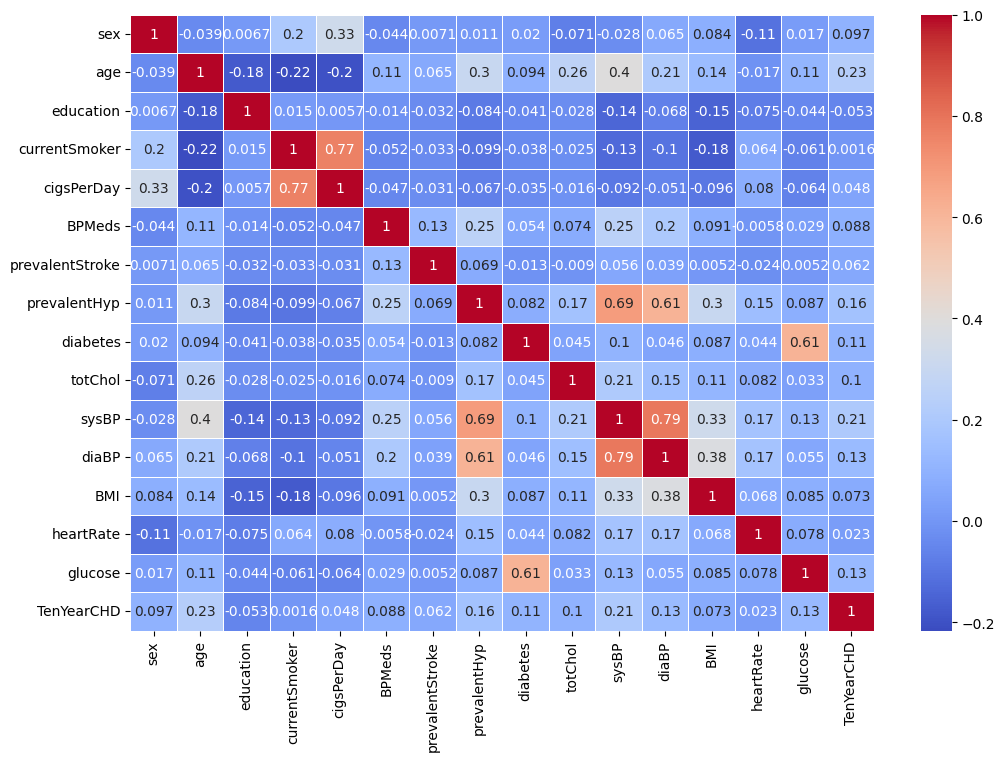

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation plot: If a high corr is present between 2 variables, these can be used to inform imputation of NA values
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Because more data will lead to a more accurate model for the strategy chosen (whether it is knn, linear regression, etc.), NA data will be replaced as much as possible rather than dropping rows with missing data. (NA data replaced by a statistical value will be subject to the data it is in. For example, an NA education value in train will be replaced by the mean of education in train)

**education** - Because there is no correlation with any other metric and a usual distribution is observed in the histogram, the median value will be imputed. Mean is not useful as this is an ordinal variable

**cigsPerDay** - Imputation. 2 buckets will be made. 1 if you are a current smoker and another for non smokers. cigsPerDay will be assigned the median value of current smokers and 0 if non smoker.

**BPMeds** - NA's will be assigned value according to proportion of dataset (i.e., in train data 3% of column is 1 so of the 37 NA values, 1 will be a 1 and 36 will be a 0)

**totChol** - Because there is no correlation with any other metric and a usual distribution is observed in the histogram, the mean value will be imputed.

**BMI** - 15 rows from the train set and 4 rows from the test set will be dropped.

**heartRate** - One row from the test set will be dropped

**glucose** - Imputation. 2 buckets will be made. 1 if you are diabetic and another for non diabetics. glucose will be assigned the mean value of diabetics if diabetic and mean value of non diabetics if non diabetic.

In [ ]:
print('Missing Train Values')
print(train.isnull().sum(), '\n')

print('Missing Test Values')
print(test.isnull().sum())

Missing Train Values
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64 

Missing Test Values
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             10
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            102
TenYearCHD           0
dtype: int64


In [ ]:
#Replacing NA in education ith median
edu_train = train['education'].median()
train['education'].fillna(edu_train, inplace=True)

edu_test = test['education'].median()
test['education'].fillna(edu_test, inplace=True)

In [ ]:
#Replacing NA for cigsPerDay with 0 if non smoker and 18 if smoker (both train and test have average of 18 for smokers)
train.loc[:,['cigsPerDay', 'currentSmoker']].groupby('currentSmoker').describe()
for index, row in train.iterrows():
    if row['currentSmoker'] == 0:
        if pd.isna(row['cigsPerDay']):
            train.at[index, 'cigsPerDay'] = 0
    else:
        if pd.isna(row['cigsPerDay']):
            train.at[index, 'cigsPerDay'] = 18


test.loc[:,['cigsPerDay', 'currentSmoker']].groupby('currentSmoker').describe()
for index, row in test.iterrows():
    if row['currentSmoker'] == 0:
        if pd.isna(row['cigsPerDay']):
            test.at[index, 'cigsPerDay'] = 0
    else:
        if pd.isna(row['cigsPerDay']):
            test.at[index, 'cigsPerDay'] = 18


In [ ]:
#For train, 3% of values are 1, so of the 37 values only 1 will be assigned a 1
train['BPMeds'].value_counts()

indices = train[train['BPMeds'].isna()].index.tolist()
random_index = np.random.choice(indices)
train.at[random_index, 'BPMeds'] = 1.0
indices.remove(random_index)
train.loc[indices, 'BPMeds'] = 0.0

#For test, 3% of values are 1, so of the 16 values 0 will be assigned a 1
test['BPMeds'].value_counts()
test['BPMeds'].fillna(0.0, inplace=True)


In [ ]:
#totChol replaced with mean in both train and test data sets
train['totChol'].describe()
train['totChol'].fillna(236.6, inplace=True)

test['totChol'].describe()
test['totChol'].fillna(237.0, inplace=True)

In [ ]:
#15 rows removed from train and 5 rows removed from test
train.dropna(subset=['BMI'], inplace=True)
test.dropna(subset=['BMI', 'heartRate'], inplace=True)

In [ ]:
#Replacing NA for glucose with 79.41 if subject doesn't have diabetes and 165.43 if they have diabetes for train
train.loc[:,['glucose', 'diabetes']].groupby('diabetes').describe()

for index, row in train.iterrows():
    if row['diabetes'] == 0.0:
        if pd.isna(row['glucose']):
            train.at[index, 'glucose'] = 79.41
    else:
      if row['diabetes'] == 1.0:
        if pd.isna(row['glucose']):
            train.at[index, 'glucose'] = 165.43

#Replacing NA for glucose with 79.78 if subject doesn't have diabetes and 181.38 if they have diabetes for test
test.loc[:,['glucose', 'diabetes']].groupby('diabetes').describe()

for index, row in test.iterrows():
    if row['diabetes'] == 0.0:
        if pd.isna(row['glucose']):
            test.at[index, 'glucose'] = 79.78
    else:
      if row['diabetes'] == 1.0:
        if pd.isna(row['glucose']):
            test.at[index, 'glucose'] = 181.38


In [ ]:
#There are now no NA values to interfere with the model being run

print('Missing Train Values')
print(train.isnull().sum(), '\n')

print('Missing Test Values')
print(test.isnull().sum())

Missing Train Values
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64 

Missing Test Values
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### End of EDA and Cleaning

## Model Training and Performance

Todo :

- Do couple shallow-depth trees
- look into how variables interact interestingly
- possibly do some other minor research on wikipedia to try and find things which could back it up

### Decision Trees

In [ ]:
#We want to make some decision trees, import these
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [ ]:

# MAKE TRAINING / TESTING DATA
ZeroDivisionError
# Make our vars to look at
vars = ['age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP','glucose']
# X_train = train.loc[:, vars]

X_train = train[['age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP','glucose']]

Y_train = train["TenYearCHD"]

#Create testing data

# X_test = test.loc[:, vars]
X_test = test[['age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP','glucose']]

Y_test = test["TenYearCHD"]


#X_train = train.drop(["TenYearCHD"], axis = 1
#X_train = pd.concat([train.loc[:,vars], currentSmoker_dummy, cigsPerDay_dummy, diabetes_dummy], axis=1)
#Show what it looks like
#print(X_train)



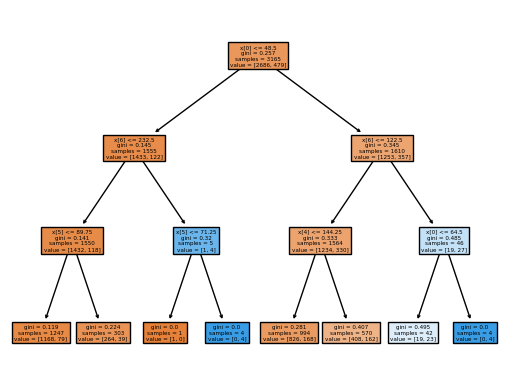

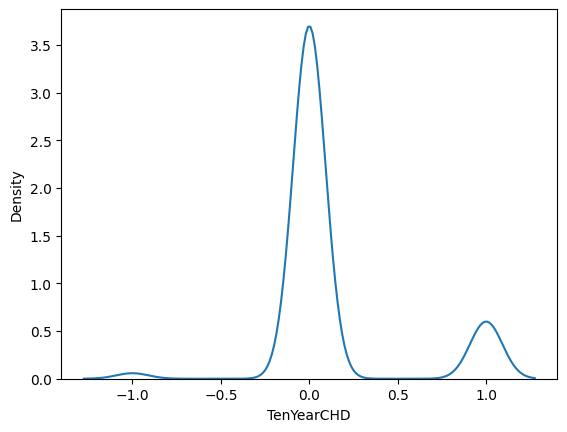

Rsq:  -0.20886888645364543 

RMSE:  0.3883991374128861 



In [ ]:
#Create a decision tree classifier, MAKE SURE TO USE max_depth = ... (we want shallow here but without max_depth it gets way too big)
myTree = DecisionTreeClassifier(max_depth = 3)

#Run a fit on our data
myTree = myTree.fit(X_train, Y_train)

#var_names = myTree.feature_names_in_

# Show vizualizations for our tree
plot_tree(myTree, filled = True)
plt.show()


# Dummy variables for testing
# currentSmoker_dummy_t = pd.get_dummies(test['currentSmoker'])
# cigsPerDay_dummy_t = pd.get_dummies(test['cigsPerDay'])
# diabetes_dummy_t = pd.get_dummies(test['diabetes'])

# MAKE TESTING DATA

#Make copies of our cleaned train data
# Y_test = test["TenYearCHD"]
#X_test = train.drop(["TenYearCHD"], axis = 1)

# vars_t = ['prevalentStroke', 'BMI', 'age']

#X_test = pd.concat([test.loc[:,vars_t], currentSmoker_dummy_t, cigsPerDay_dummy_t, diabetes_dummy_t], axis=1)

# X_test = test.loc[:, vars_t]
#X_test = test.drop(["TenYearCHD"], axis = 1)


## Make Predictions on the Test Set
Y_hat = myTree.predict(X_test)

## Residuals, Rsq, RMSE
e = Y_test - Y_hat
sns.kdeplot(e) # Notice the residuals aren't centered around zero
plt.show()
rsq = 1 - np.sum(e**2)/np.sum( (Y_test - np.mean(Y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')



In [ ]:
from sklearn.metrics import accuracy_score

tree_acc = accuracy_score(Y_test, Y_hat)
sse = np.sum((Y_test - Y_hat) ** 2)
tss = np.sum((Y_test - Y_train.mean()) **2)

Our decision tree

### Linear Regression

In [ ]:
#import linear regression
from sklearn import linear_model

# Numeric regression:
var_n = [ 'age', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'sysBP', 'diaBP','glucose']
X_train_n = train.loc[:,var_n]



#Make y for both training and testing data
y_train = train['TenYearCHD']
y_test = test['TenYearCHD']

# X_train_n = train.drop(['TenYearCHD'], axis = 1)
# X_test_n = test.drop(['TenYearCHD'], axis = 1)

# ready test
X_test_n = test.loc[:, var_n]

from sklearn.preprocessing import StandardScaler

#Need to normalize data
scaler = StandardScaler()

# Use a fit_transform() for the scaler, then use transform on the test data too
X_train_scaled = scaler.fit_transform(X_train_n)
X_test_scaled = scaler.transform(X_test_n)



# We need to create a training / testing split to avoid overfitting
from sklearn.model_selection import train_test_split

#Create random training set from this data (80%), throw away other 20% (We already have test data in other file)
X_train_ready, X_throwaway, y_train_ready, y_throwaway = train_test_split(X_train_scaled, y_train,
                                                    test_size=.2,
                                                    random_state=100)



#Create model and call fit on it
reg_n = linear_model.LinearRegression().fit(X_train_ready, y_train_ready)



# predict to calculate accuracy
y_hat = reg_n.predict(X_test_scaled)

# Show R^2 and RMSE
print('Rsq: ', reg_n.score(X_test_scaled, y_test))

rmse_n = np.sqrt(np.mean( (y_test - y_hat)**2 ))

print('RMSE: ', rmse_n) # R2


Rsq:  0.09571405134253941
RMSE:  0.33588754145529764


### K Means Clustering

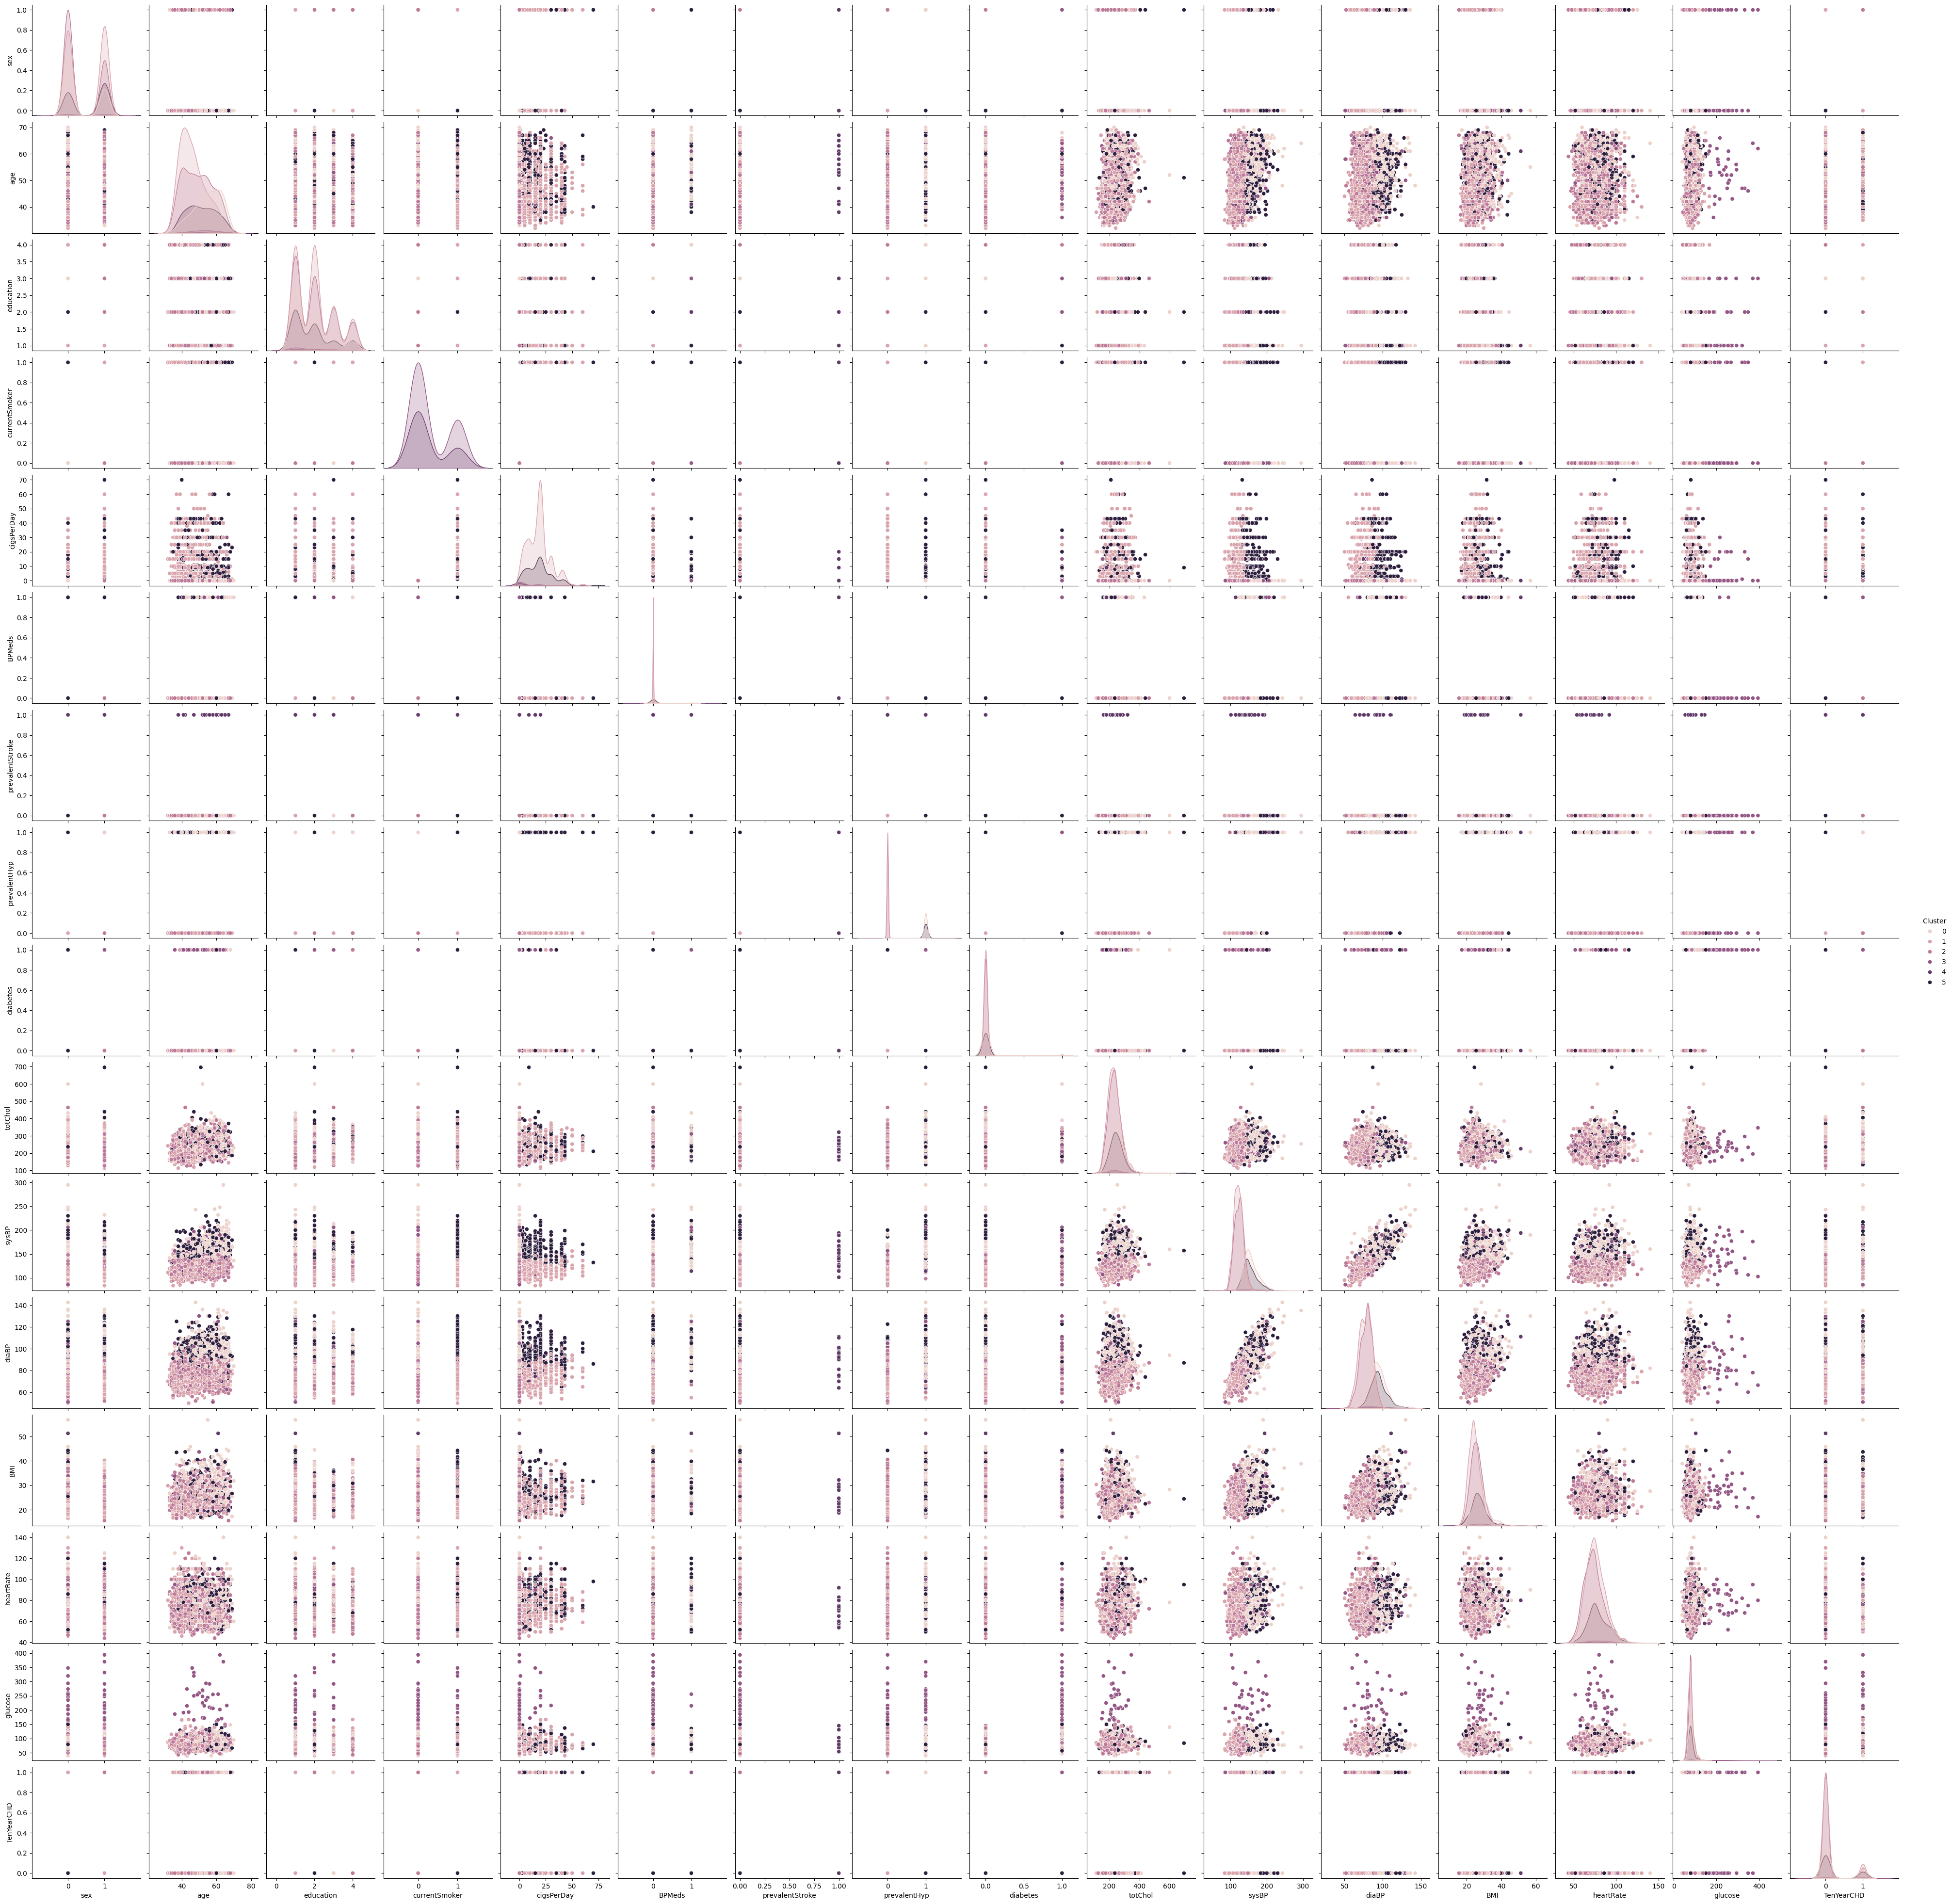

In [ ]:
from sklearn.cluster import KMeans # Import kmc
import pandas as pd
from sklearn.preprocessing import StandardScaler

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # this is for all the vars with the train data

# perform KMeans clustering
k = 6  # number of clusters
kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10,  random_state=0)
model = kmeans.fit(X_train_scaled)
train['Cluster'] = model.labels_

sns.pairplot(data=train,hue='Cluster')

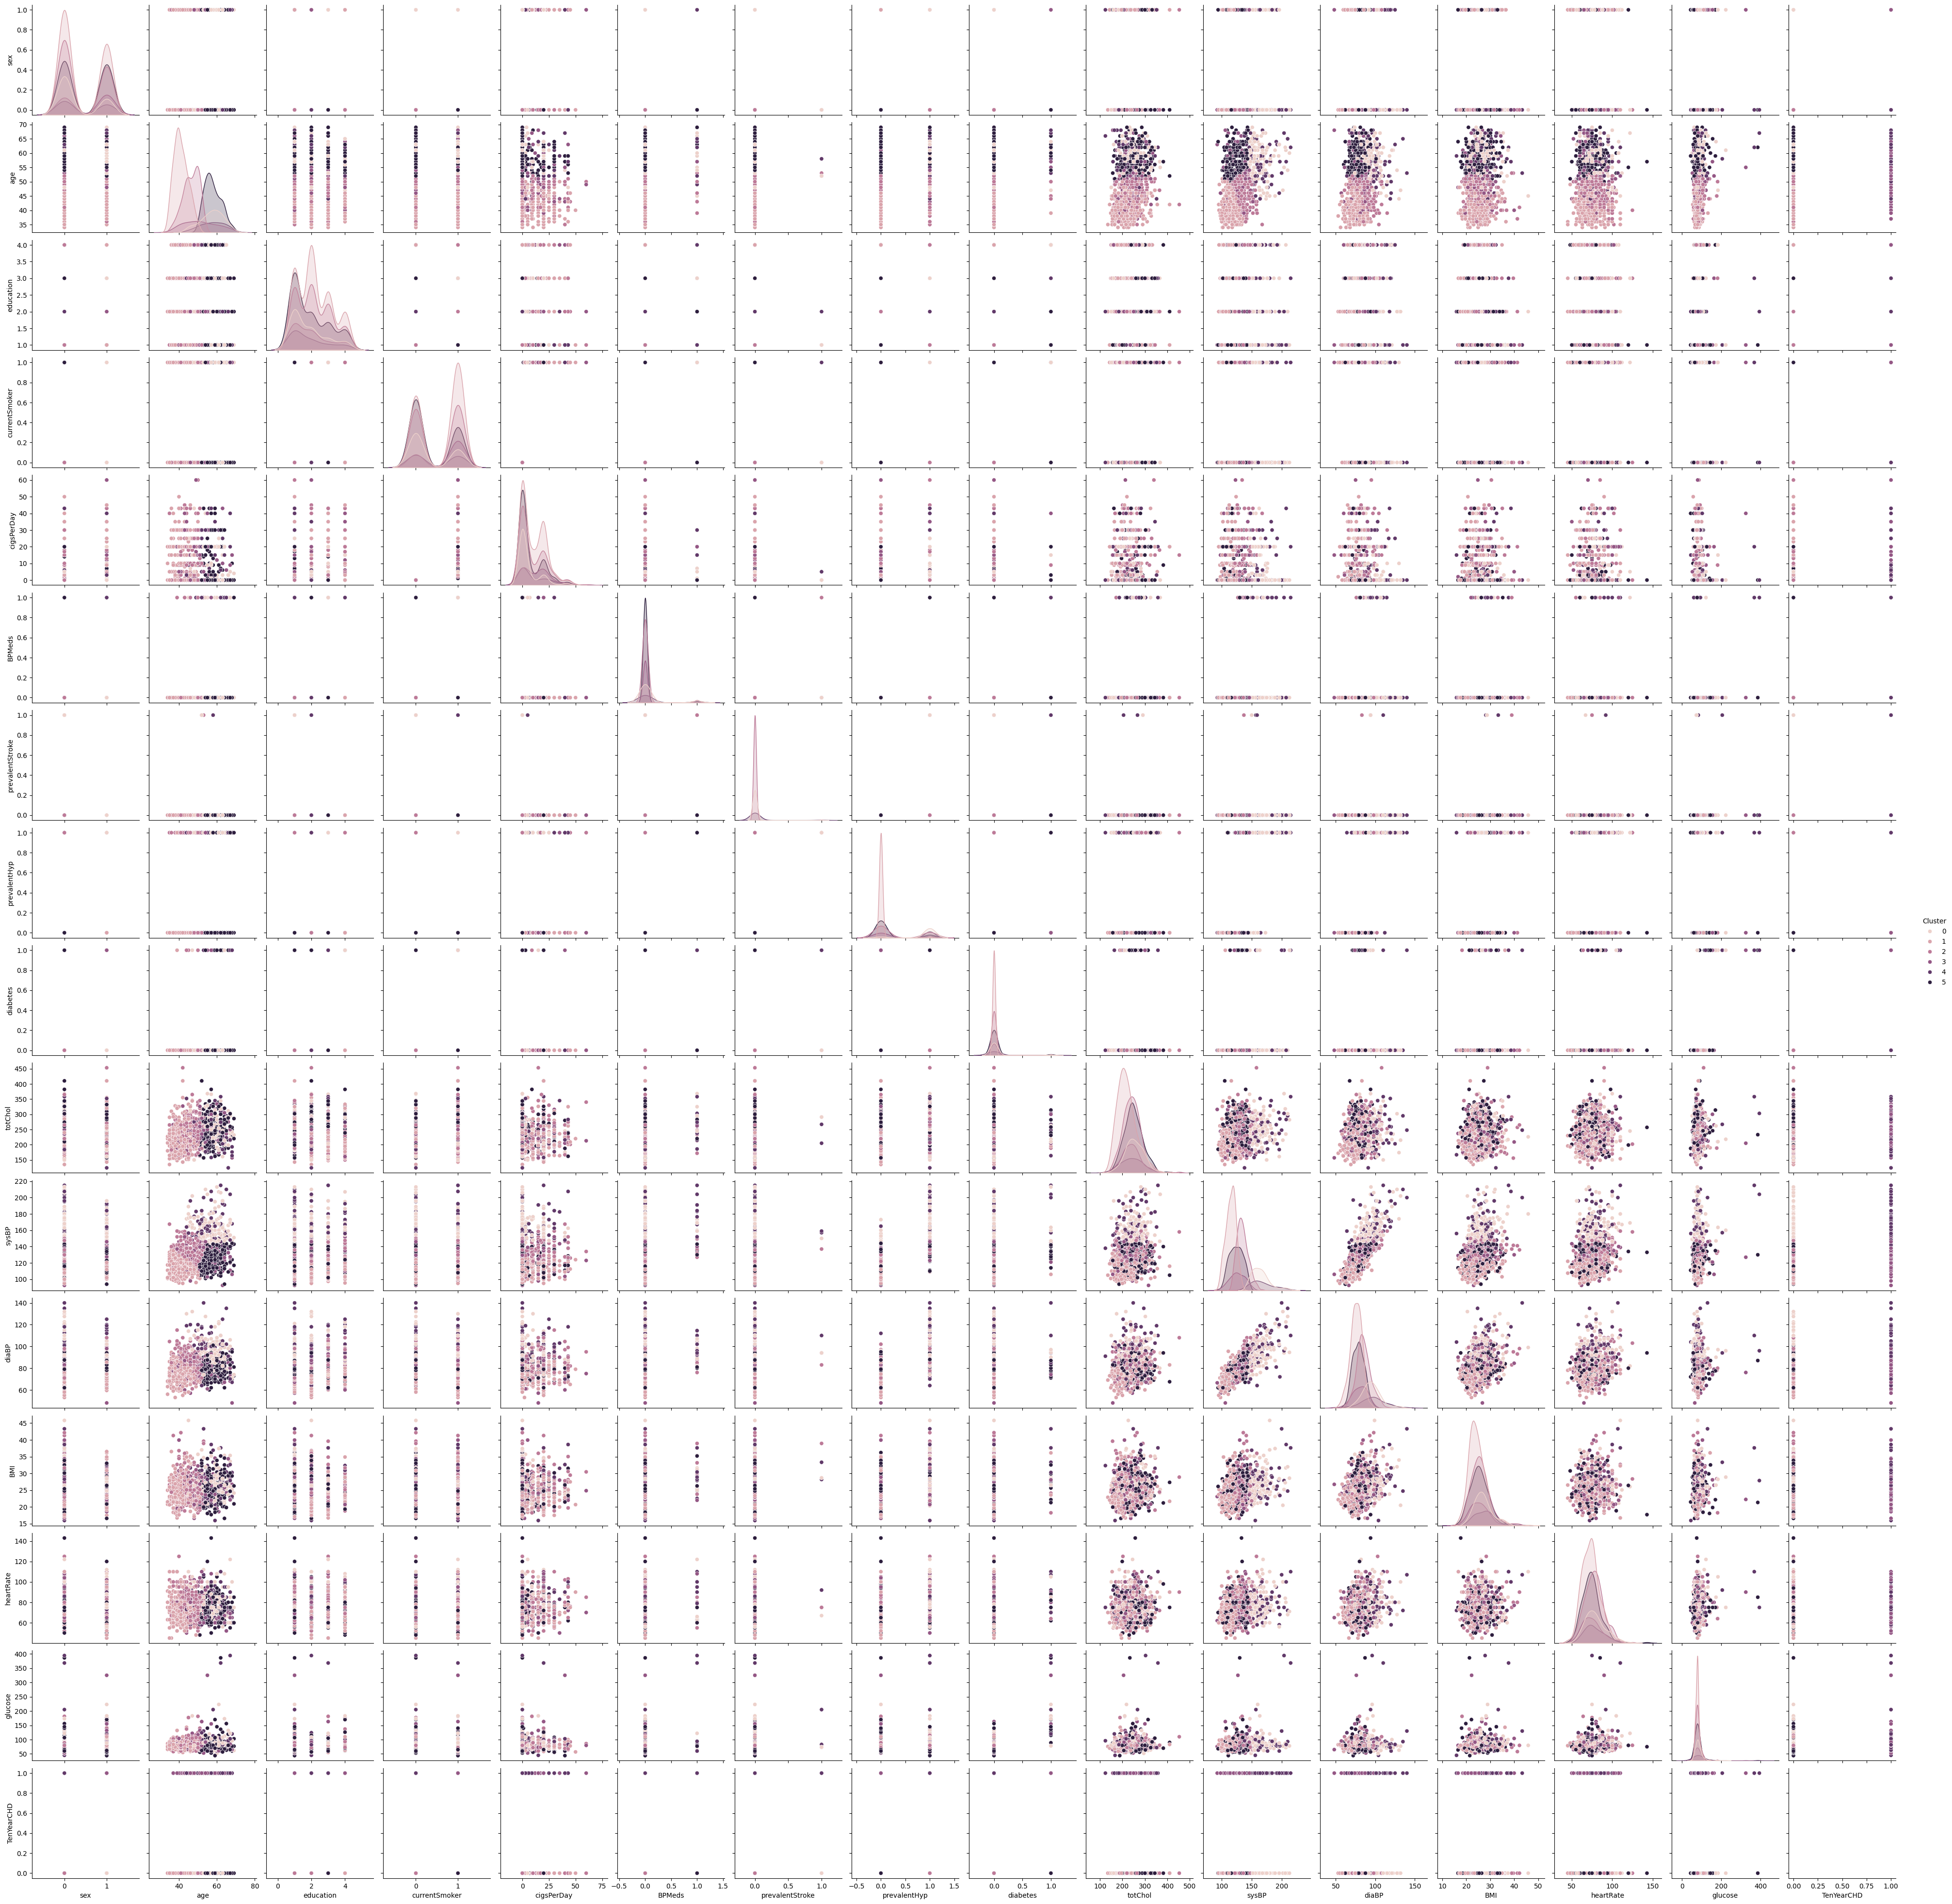

In [ ]:
vars_related_to_tenyearCHD = ['age', 'TenYearCHD', 'sysBP'] # for the vars with test data

# testing data
X_train_new = test[vars_related_to_tenyearCHD]

# normalize the data
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)

# perform KMeans clustering
k = 6  # number of clusters
kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
test['Cluster'] = kmeans.fit_predict(X_train_scaled_new)

cluster_avg_values = test.groupby('Cluster')[vars_related_to_tenyearCHD].mean()

# visualize clustering using pairplot
sns.pairplot(data=test, hue='Cluster')
plt.show()

# graph is slightly different

### End of Model Training and Performance

## Conclusions

Our methodology consisted of a series of machine learning algorithms upon the sample data. We did this due to the complexity of health issues (include CHD), and wanted to be thorough in our exploration of the issue and experiment with different explorations. After conducting trials of linear regression, decision trees, and $k$ Means Clustering, we drew conclusions, and describe those conclusions below:


### Linear Regression
We performed a linear regression upon the data to determine if there was a correlation between different attributes being present with the likelihood of developing Coronary Heart Disease over a 10 year period. We specifically looked at only a selection of variables which we believed could have a significant impact, specifically age, if they are a current smoker, if they have a prevalence towards havng strokes or a history of hypertension, as well as glucose levels, and systolic and diatolic blood pressure levels (these variables are the ones explored throughout the rest of this analysis, too).

Our linear regression analysis provided a R-squared value of 0.0957, and a Root Mean Squared Error of 0.3359. This means roughly 9.5% of the variability in likelihood of developing CHD over a 10 year period could be explained by a connection between these vairbales, and that on average, the predictions were about 0.3359 units off from the actual values (so considering our actual values were binary, we can conclude this model proved correct about 2/3 of the time). This demononstrates there is a connection between these variables and the likelihood of developing CHD, however not a definitive, certain one - this model proved to be far from perfect, although provided a good benchmark to start with.


### Decision Tree
The decision tree was the most helpful of the graphs we made. The first determining factor was people older than 48 were more likely to have coronary heart disease, and of those over 48, people with high glucose were more likely to. The tree then provided a further subdivide, narrowing down age to those over 64 years old. For those below 48 with high glucose, the next determining factor was diaBP, however those without high glucose under 48 were found more likely to suffe CHD if they had sysBP.

We found it interesting that age was used again as a variable for those over 48 and with high glucose, especially that the other split occured for people over 64 years old. Overall, through the decision tree method, we were able to minimize our gini significantly (down to 0 in some cases, and close to 0 in others) over multiple levels of the tree, however it may have overspecified at some extremes (for example, there are less than 5 samples in each of our three smallest "buckets" at the bottom of the tree, with all other 3,156 being distributed between the other 5). Therefore, we conclude there is a high probability that if you fall into one of those three specific categories, you are more likely to have CHD.

### K Means Clusters
In order to cover all bases we decided to create K Means clusters for all graphs to see the groupings between one variable and the rest. After making all the graphs we were not able to find any significant cluster between the groupings. This further confirms how complicated medical issues can be to pin on one specific cause.
